<a href="https://colab.research.google.com/github/HR-Analysis/AI-ML/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Titanic-Dataset.csv to Titanic-Dataset.csv
First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Histograms:


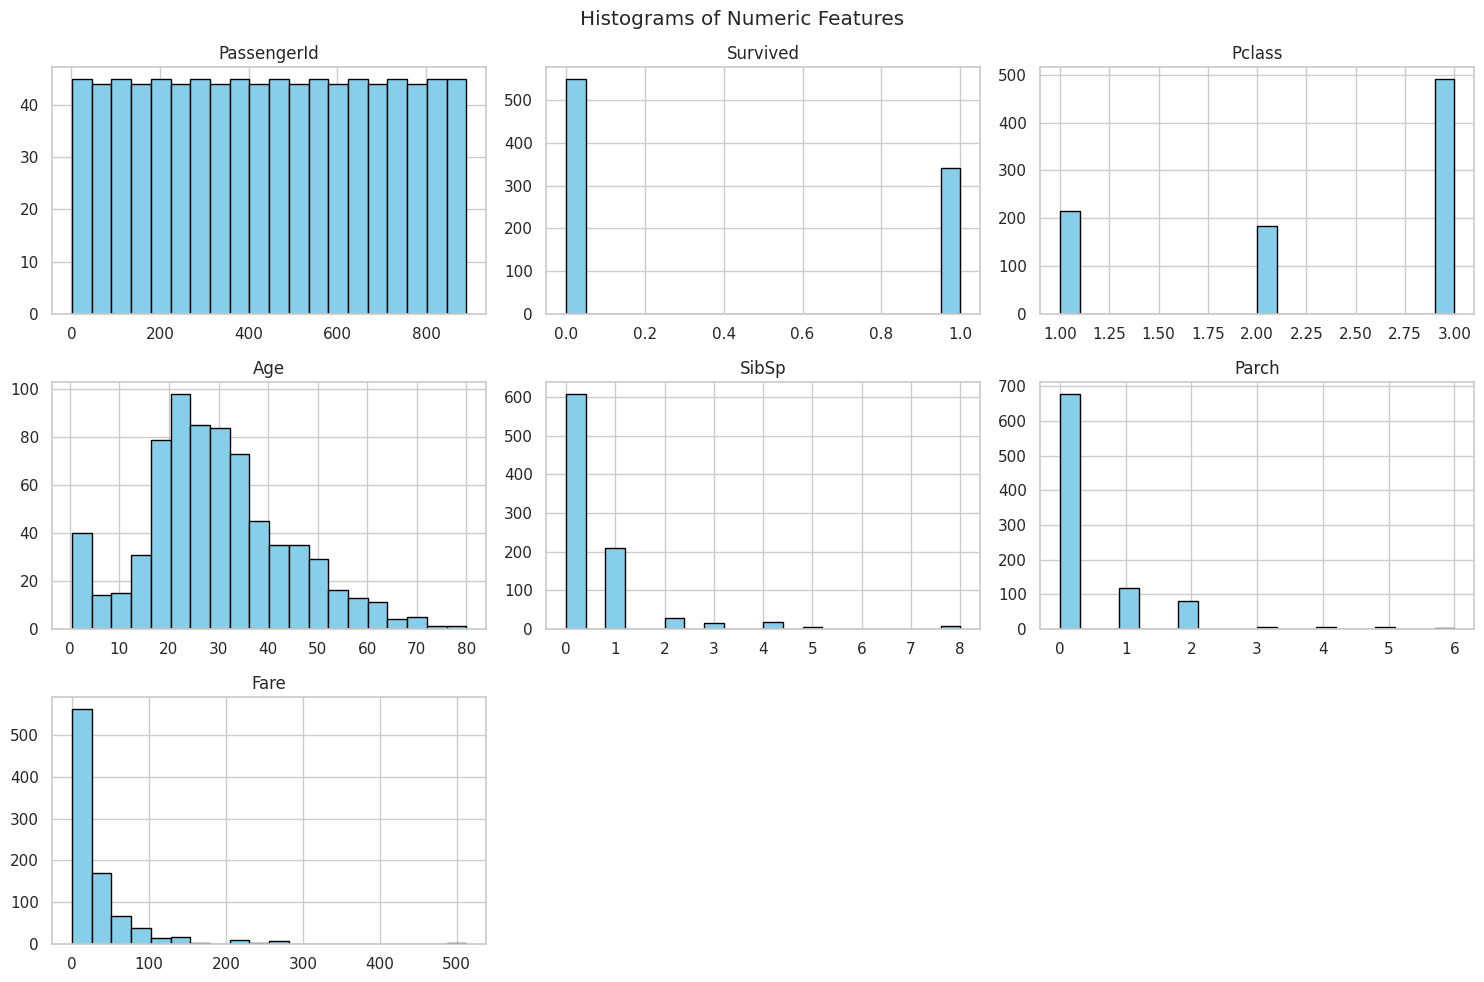


Boxplots:


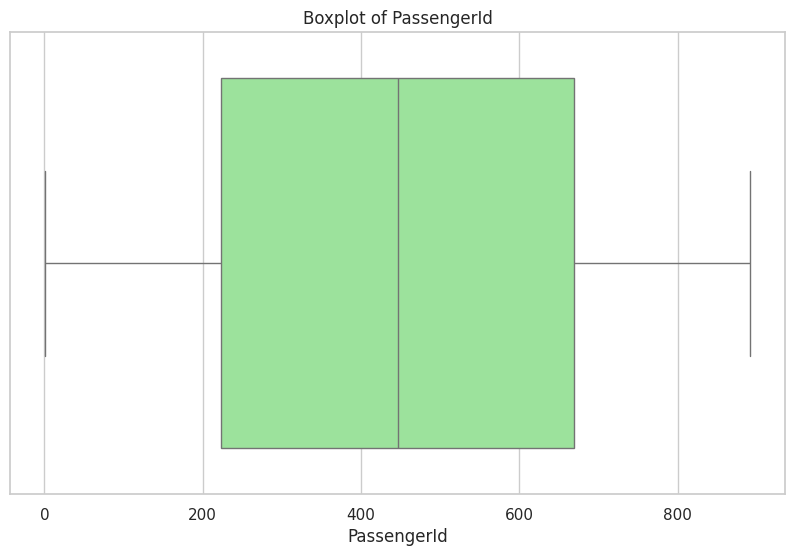

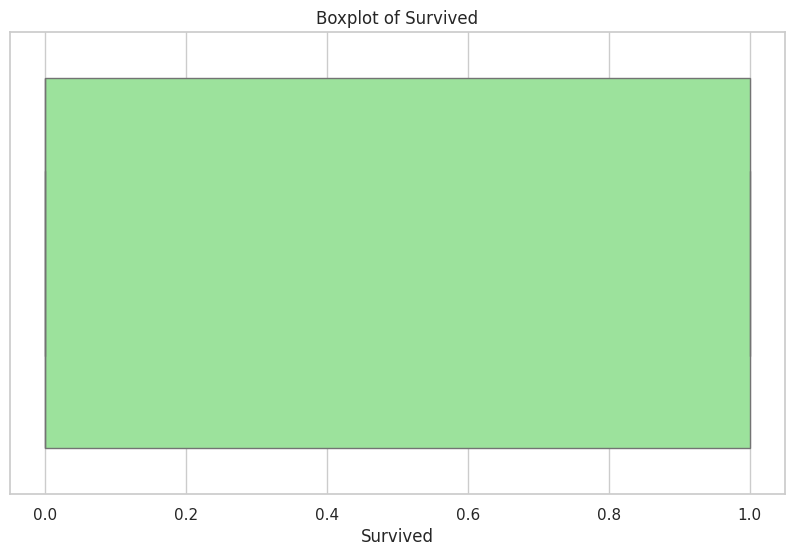

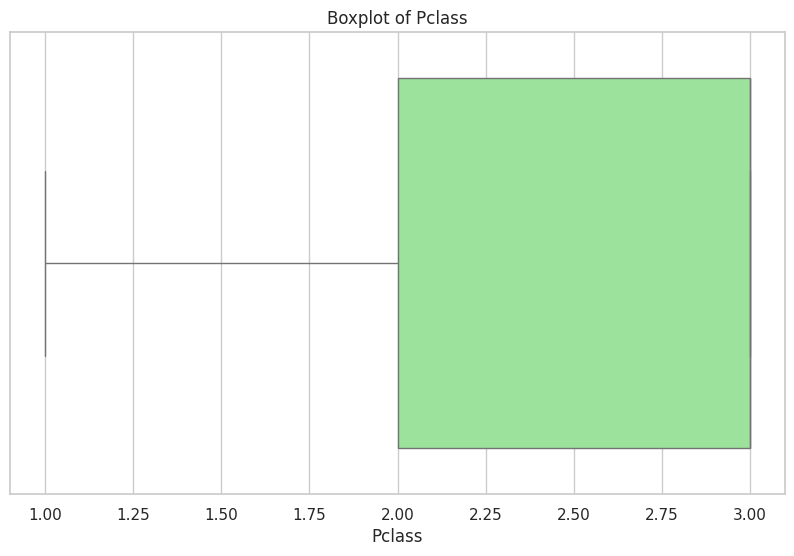

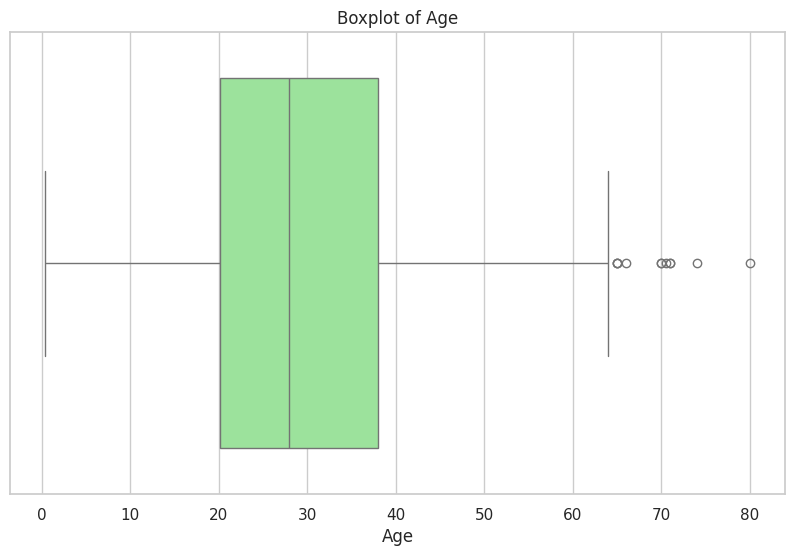

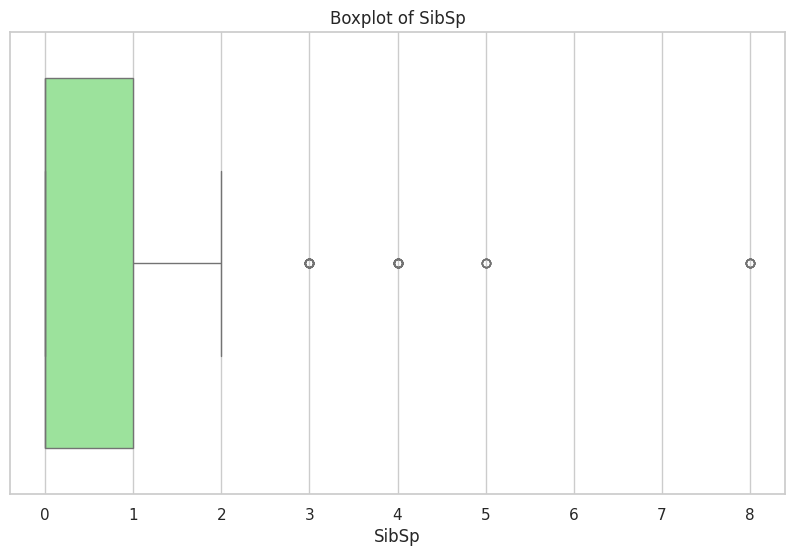

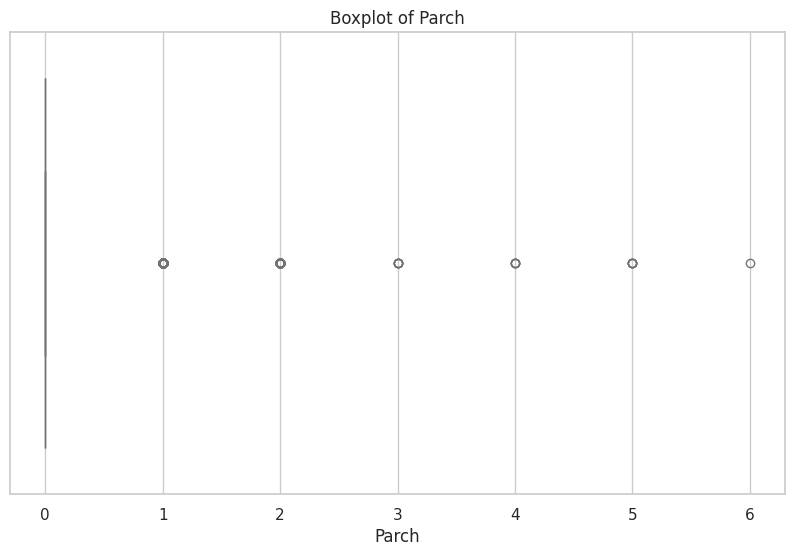

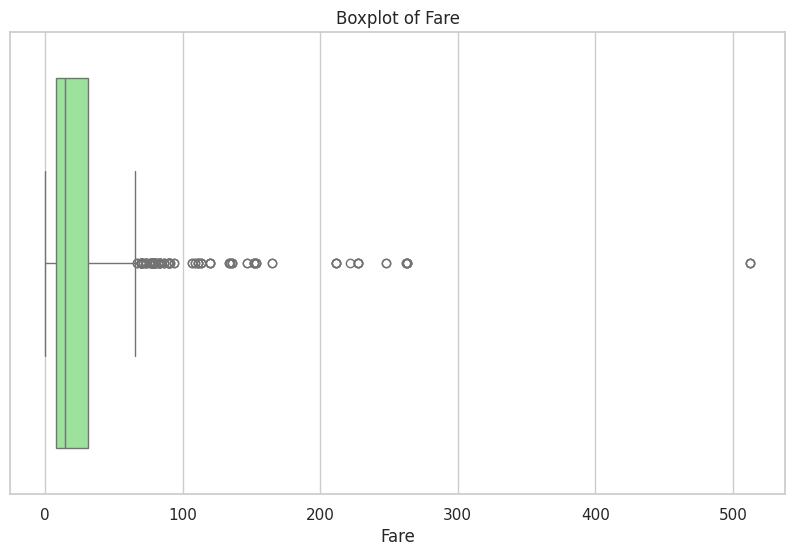


Pairplot of numeric features (may take time on large datasets):


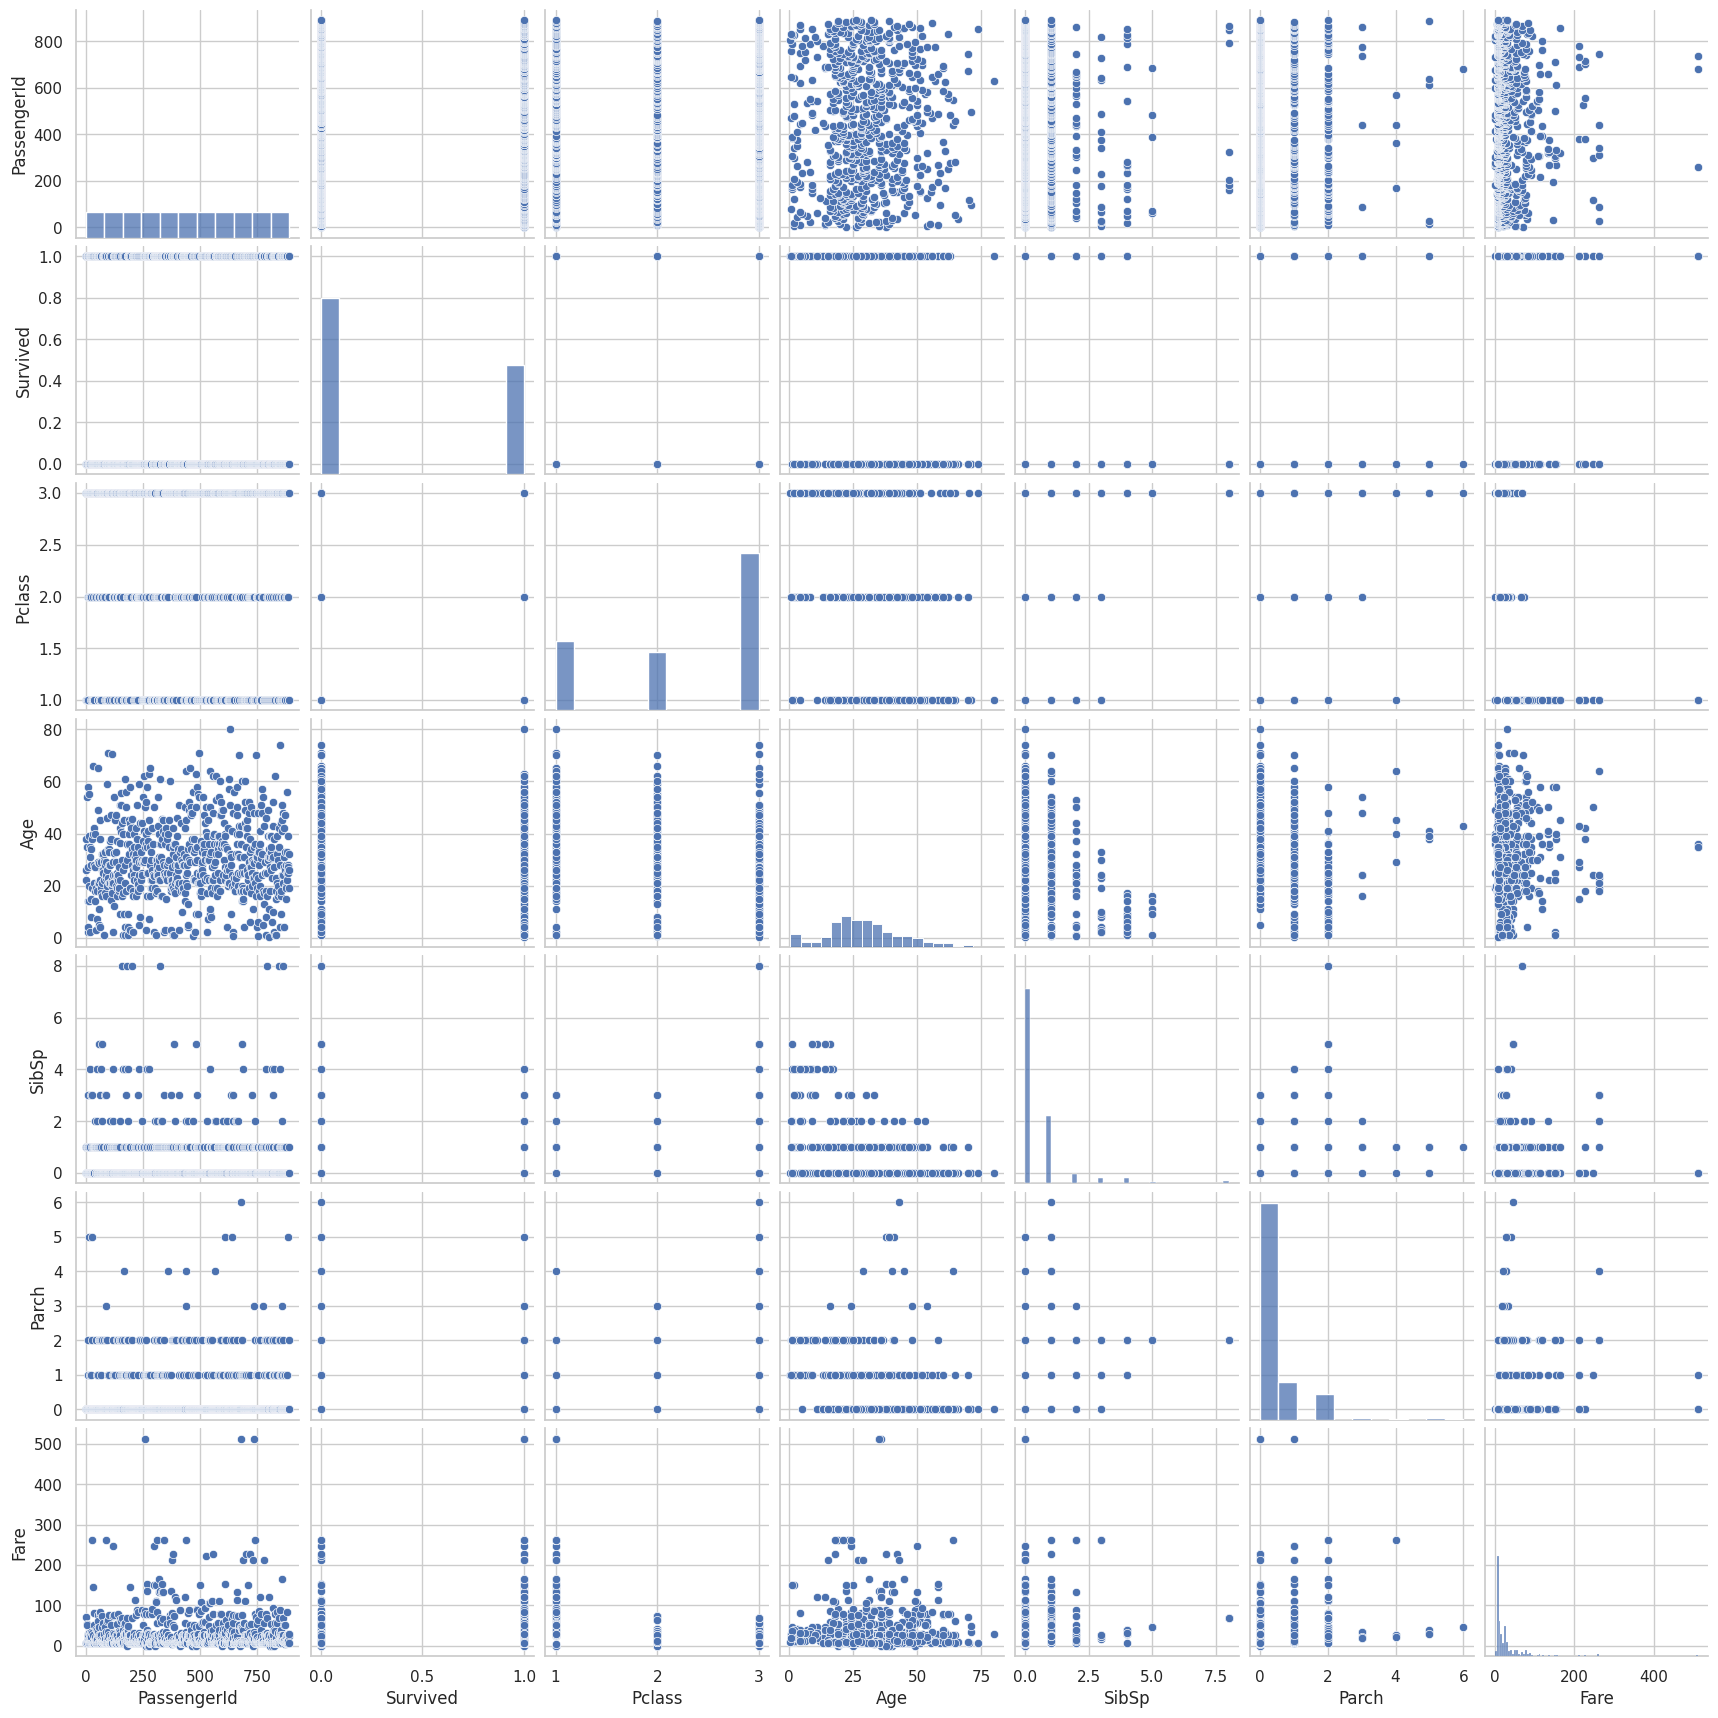


Correlation Matrix:


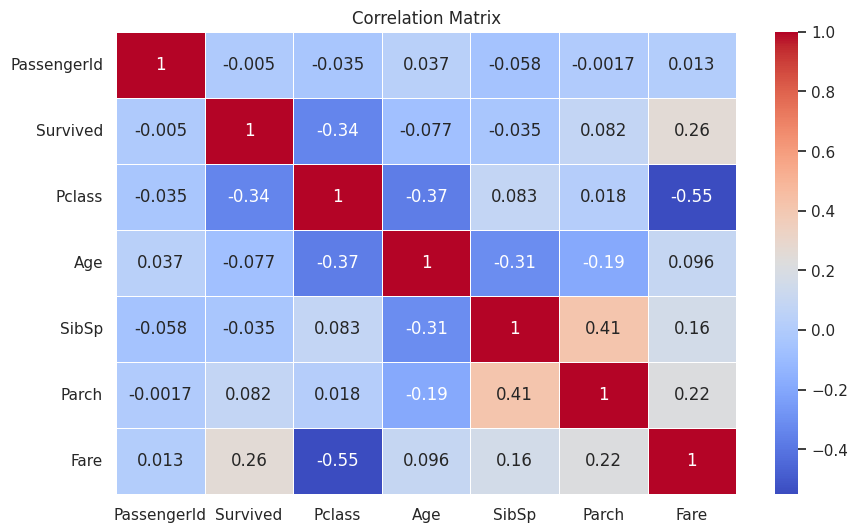


Outliers and trends might appear in boxplots and pairplots above.
High correlation values (close to +1/-1) might indicate strong linear relationships.

Sample Feature-level Inferences:
PassengerId - Mean: 446.00, Median: 446.00, Std Dev: 257.35
Survived - Mean: 0.38, Median: 0.00, Std Dev: 0.49
Pclass - Mean: 2.31, Median: 3.00, Std Dev: 0.84
Age - Mean: 29.70, Median: 28.00, Std Dev: 14.53
SibSp - Mean: 0.52, Median: 0.00, Std Dev: 1.10
Parch - Mean: 0.38, Median: 0.00, Std Dev: 0.81
Fare - Mean: 32.20, Median: 14.45, Std Dev: 49.69


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
df.info()
print("\nSummary Statistics:")
display(df.describe())

print("\nHistograms:")
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

print("\nBoxplots:")
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

print("\nPairplot of numeric features (may take time on large datasets):")
sns.pairplot(df[numeric_cols])
plt.show()

print("\nCorrelation Matrix:")
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

print("\nOutliers and trends might appear in boxplots and pairplots above.")
print("High correlation values (close to +1/-1) might indicate strong linear relationships.")

print("\nSample Feature-level Inferences:")
for col in numeric_cols:
    print(f"{col} - Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}, Std Dev: {df[col].std():.2f}")


In [2]:
# Calculate mean, median, and mode for numeric columns
mean_vals = df[numeric_cols].mean()
median_vals = df[numeric_cols].median()
mode_vals = df[numeric_cols].mode().iloc[0]  # Take the first mode in case of multiple

# Combine into one DataFrame
summary_table = pd.DataFrame({
    'Mean': mean_vals,
    'Median': median_vals,
    'Mode': mode_vals
})

# Display the summary statistics table
print("📊 Mean, Median, and Mode Table:")
display(summary_table)


📊 Mean, Median, and Mode Table:


,Mean,Median,Mode
PassengerId,446.000000,446.0000,1.00
Survived,0.383838,0.0000,0.00
Pclass,2.308642,3.0000,3.00
Age,29.699118,28.0000,24.00
SibSp,0.523008,0.0000,0.00
Parch,0.381594,0.0000,0.00
Fare,32.204208,14.4542,8.05


from matplotlib import pyplot as plt
summary_table['Mean'].plot(kind='hist', bins=20, title='Mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table['Median'].plot(kind='hist', bins=20, title='Median')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table['Mode'].plot(kind='hist', bins=20, title='Mode')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table.plot(kind='scatter', x='Mean', y='Median', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table.plot(kind='scatter', x='Median', y='Mode', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table['Mean'].plot(kind='line', figsize=(8, 4), title='Mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_table['Median'].plot(kind='line', figsize=(8, 4), title='Median')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_table['Mode'].plot(kind='line', figsize=(8, 4), title='Mode')
plt.gca().spines[['top', 'right']].set_visible(False)